In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('C:\\Users\HP\\Desktop\\Mission_Improbable\\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [7]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [8]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
df.isnull().sum().sum()

8392

In [11]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
def clean_rate (value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(clean_rate)
df['rate'].head()
    

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
df['rate'].isnull().sum()

10019

In [14]:
df['rate'].fillna(df['rate'].mean(), inplace = True)

In [15]:
df.dropna(inplace=True)

In [16]:
# df.isnull().sum()

In [17]:
# df.fillna("missing")

In [18]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [19]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [20]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [21]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [22]:
df["rest_type"].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [23]:
restTypeDf=df['rest_type'].value_counts(ascending = True)
restTypeLessThan1000 = restTypeDf[restTypeDf<1000]
def groupRestType (value):
    if(value in restTypeLessThan1000):
        return 'others'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(groupRestType)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [24]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [26]:
df.drop(['listed_in(city)'], axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",others,Finger Food,"2,500",Pubs and bars


In [27]:
df.rename(columns = { 'votes':'VOTES',
                              'cuisines':'CUISINES', 'approx_cost(for two people)': 'costOfTwo'}, inplace = True)

In [28]:
df['CUISINES'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: CUISINES, Length: 2704, dtype: int64

In [29]:
cuisinesDf=df['CUISINES'].value_counts(ascending = False)
cuisinesLessThan100=cuisinesDf[cuisinesDf<100]
def groupCuisines (value):
    if(value in cuisinesLessThan100):
        return 'others'
    else:
        return value
df['CUISINES']=df['CUISINES'].apply(groupCuisines)
df['CUISINES'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: CUISINES, Length: 70, dtype: int64

In [30]:
df["online_order"].value_counts()

Yes    30228
No     20814
Name: online_order, dtype: int64

In [31]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [32]:
# Group the values below 500
locationDf=df['location'].value_counts(ascending=False)
locationLessThan500=locationDf[locationDf<500]
def groupLocation (value):
    if (value in locationLessThan500):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(groupLocation)
df['location'].value_counts()

others                   8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [33]:
df["book_table"].value_counts()

No     44626
Yes     6416
Name: book_table, dtype: int64

In [34]:
df['costOfTwo'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [35]:
# converting costOfTwo to float from string 
def costFloat(value):
    value=str(value)
    if ','in value:
        value=value.replace(',','')
        return float(value)
    else: 
        return float(value)
df['costOfTwo']=df['costOfTwo'].apply(costFloat)
df['costOfTwo'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [36]:
df["rate"].value_counts()

3.700142    9852
3.900000    3953
3.800000    3816
3.700000    3801
3.600000    3282
4.000000    3142
4.100000    2922
3.500000    2761
3.400000    2443
3.300000    2272
4.200000    2151
3.200000    1839
4.300000    1677
3.100000    1550
4.400000    1136
3.000000     990
2.900000     800
4.500000     653
2.800000     580
2.700000     303
4.600000     299
2.600000     249
4.700000     167
2.500000     100
2.400000      66
4.800000      66
4.900000      55
2.300000      51
2.200000      26
2.100000      24
2.000000      11
1.800000       5
Name: rate, dtype: int64

In [37]:
df

,name,online_order,book_table,rate,VOTES,location,rest_type,CUISINES,costOfTwo,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500.0,Pubs and bars,Whitefield


## Visualisations

In [53]:
# Q2) Visualize online order facility location-wise.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road'),
  Text(

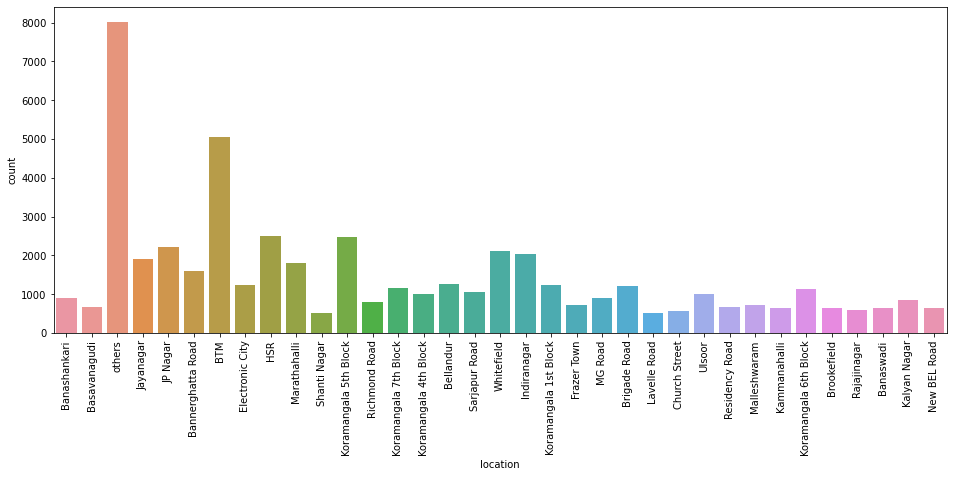

In [38]:
#Question-1
plt.figure(figsize = (16,6))
zd = sns.countplot(df.location)
plt.xticks(rotation = 90)

In [39]:
pd.pivot_table(df, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

VOTES          costOfTwo                   rate  \
online_order                No      Yes        No      Yes            No   
location                                                                   
BTM                     107109   466559    665220  1337290   6318.705970   
Banashankari             34628   127746    146280   234350   1431.717591   
Banaswadi                 5970    28875    111900   141300   1076.918584   
Bannerghatta Road        28628   186361    278980   435350   2414.840998   
Basavanagudi             32270    62649     96760   150150    885.708512   
Bellandur                38362   166946    262120   410450   1822.526386   
Brigade Road            248950   177732    372800   412640   2025.415747   
Brookefield              26600    92362     93260   195140    843.011349   
Church Street           188677   401629    198900   273700    889.701986   
Electronic City          28201    82573    345590   274650   2408.744261   
Frazer Town              17187    80481    110950   193700   1042.312909   
HSR                      91226   407096    268210   921170   2120.335465   
Indiranagar             429377   736532    515160   805960   2645.122414   
JP Nagar                184322   402200    493880   668100   3311.949793   
Jayanagar                86726   400318    246300   667150   2052.421279   
Kalyan Nagar             50598   117394    186840   304600   1301.614895   
Kammanahalli             11794    93456    115810   175750    954.514895   
Koramangala 1st Block    52629   199052    165900   367250   1405.032912   
Koramangala 4th Block   311035   374121    335350   372850   1752.315037   
Koramangala 5th Block  1088003  1126080    656050   989000   3432.513619   
Koramangala 6th Block   184959   278544    295050   403850   1619.805249   
Koramangala 7th Block   149038   339187    195050   500550   1460.010781   
Lavelle Road            223961   271816    438400   238650   1266.004681   
MG Road                 195297   232969    633200   399300   1962.911916   
Malleshwaram             78433   160534    184050   214540   1139.908795   
Marathahalli            170209   264026    391950   533100   2519.636175   
New BEL Road             56689   118998    118250   193550    933.713902   
Rajajinagar              30113    55161    124850   132750   1030.514754   
Residency Road          177627   112886    518300   128600   1651.007377   
Richmond Road            75119    43783    427200   180350   2099.825393   
Sarjapur Road            60526   338073    195400   402350   1191.617591   
Shanti Nagar             24552    30746    127850   101150   1033.516456   
Ulsoor                   45724   134508    431000   345600   1470.713193   
Whitefield              180346   285388    632960   630900   3575.153056   
others                  503319   906857   2101909  2150806  13350.682291   

                                     
online_order                    Yes  
location                             
BTM                    11891.161851  
Banashankari            1868.404823  
Banaswadi               1198.606526  
Bannerghatta Road       3305.613619  
Basavanagudi            1627.904114  
Bellandur               2701.212200  
Brigade Road            2456.007235  
Brookefield             1529.704681  
Church Street           1362.501277  
Electronic City         2028.614470  
Frazer Town             1550.108512  
HSR                     7064.135749  
Indiranagar             5087.210356  
JP Nagar                4856.322272  
Jayanagar               5167.818726  
Kalyan Nagar            1867.606242  
Kammanahalli            1394.105958  
Koramangala 1st Block   3165.921705  
Koramangala 4th Block   2194.509930  
Koramangala 5th Block   6443.712484  
Koramangala 6th Block   2636.305391  
Koramangala 7th Block   3043.606384  
Lavelle Road             860.101277  
MG Road                 1459.702412  
Malleshwaram            1566.602553  
Marathahalli            3941.820286  
New BEL Road            1444.90567

In [ ]:
df.plot(kind='bar',figsize=(15,8))

<AxesSubplot:xlabel='book_table', ylabel='rate'>

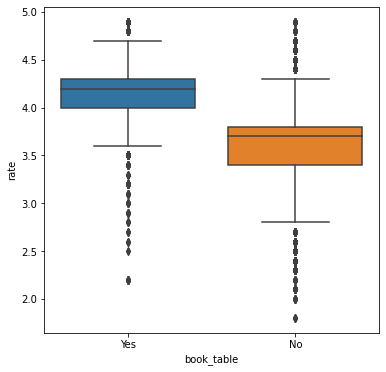

In [40]:
# Question-3
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table', y='rate', data=df)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

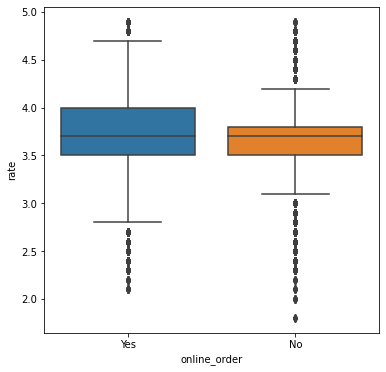

In [41]:
# Question-4
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data=df)

In [42]:
# Question-5
z_df2=pd.pivot_table(df, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
z_df2

VOTES          costOfTwo                   rate  \
book_table                  No      Yes        No      Yes            No   
location                                                                   
BTM                     387231   186437   1854310   148200  17521.165977   
Banashankari            115032    47342    330330    50300   3043.420995   
Banaswadi                31645     3200    246400     6800   2245.525109   
Bannerghatta Road       104219   110770    624130    90200   5331.654475   
Basavanagudi             88824     6095    225710    21200   2450.812626   
Bellandur               108317    96991    540370   132200   4125.738586   
Brigade Road            198590   228092    557840   227600   3753.422272   
Brookefield              81247    37715    232600    55800   2085.315747   
Church Street           342820   247486    266300   206300   1496.803263   
Electronic City          69868    40906    502090   118150   4059.358447   
Frazer Town              81818    15850    298000     6650   2558.121421   
HSR                     315456   182866    993630   195750   8316.669937   
Indiranagar             590485   575424    782670   538450   5886.729933   
JP Nagar                223769   362753    841080   320900   6887.468235   
Jayanagar               280290   206754    638500   274950   6108.438586   
Kalyan Nagar             75591    92401    327490   163950   2556.720286   
Kammanahalli             65840    39410    248910    42650   2145.920854   
Koramangala 1st Block   149198   102483    482950    50200   4354.554616   
Koramangala 4th Block   177515   507641    352600   355600   2598.623265   
Koramangala 5th Block  1019647  1194436    847250   797800   6923.822981   
Koramangala 6th Block   367436    96067    564400   134500   3795.110640   
Koramangala 7th Block   285870   202355    498800   196800   3810.117165   
Lavelle Road            143823   351954    278150   398900   1145.005958   
MG Road                  93891   334375    427000   605500   2005.014328   
Malleshwaram            124495   114472    267140   131450   2331.811349   
Marathahalli            164522   269713    718850   206200   5789.856461   
New BEL Road            101659    74028    253900    57900   2147.719577   
Rajajinagar              48296    36978    210600    47000   1977.618442   
Residency Road          163784   126729    346800   300100   1955.209930   
Richmond Road            55900    63002    411650   195900   2550.428372   
Sarjapur Road            89598   309001    389750   208000   3212.227521   
Shanti Nagar             31350    23948    168200    60800   1579.920144   
Ulsoor                  100772    79460    460550   316050   3072.323833   
Whitefield              220594   245140    926660   337200   6634.476038   
others                  666734   743442   3096365  1156350  25950.350243   

                                    
book_table                     Yes  
location                            
BTM                     688.701844  
Banashankari            256.701419  
Banaswadi                30.000000  
Bannerghatta Road       388.800142  
Basavanagudi             62.800000  
Bellandur               398.000000  
Brigade Road            728.000709  
Brookefield             287.400284  
Church Street           755.400000  
Electronic City         378.000284  
Frazer Town              34.300000  
HSR                     867.801277  
Indiranagar            1845.602837  
JP Nagar               1280.803830  
Jayanagar              1111.801419  
Kalyan Nagar            612.500851  
Kammanahalli            202.700000  
Koramangala 1st Block   216.400000  
Koramangala 4th Block  1348.201702  
Koramangala 5th Block  2952.403121  
Koramangala 6th Block   461.000000  
Koramangala 7th Block   693.500000  
Lavelle Road            981.100000  
MG Road                1417.600000  
Malleshwaram            374.700000  
Marathahalli            671.600000  
New BEL Road            230.900000  
Rajajinagar             17

<AxesSubplot:xlabel='location'>

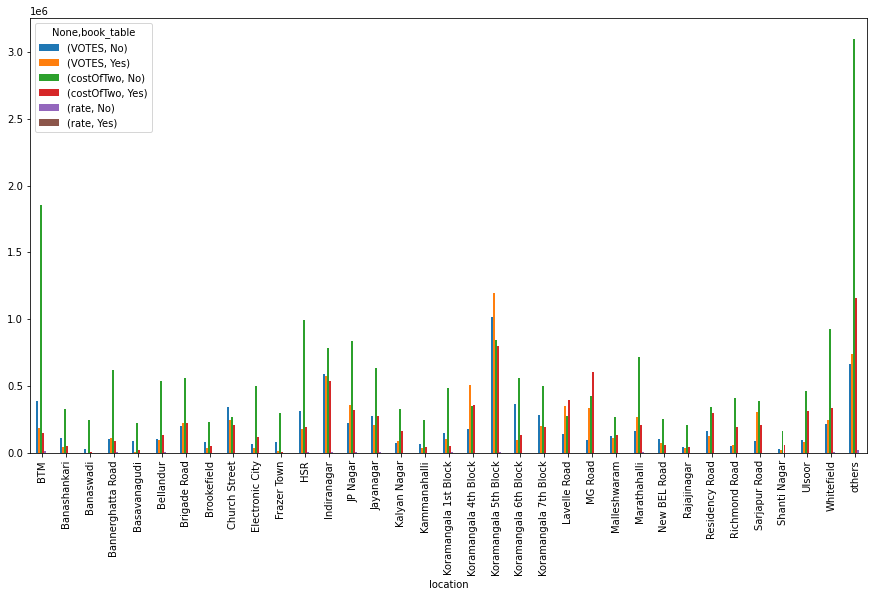

In [43]:
z_df2.plot(kind='bar', figsize = (15,8))

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

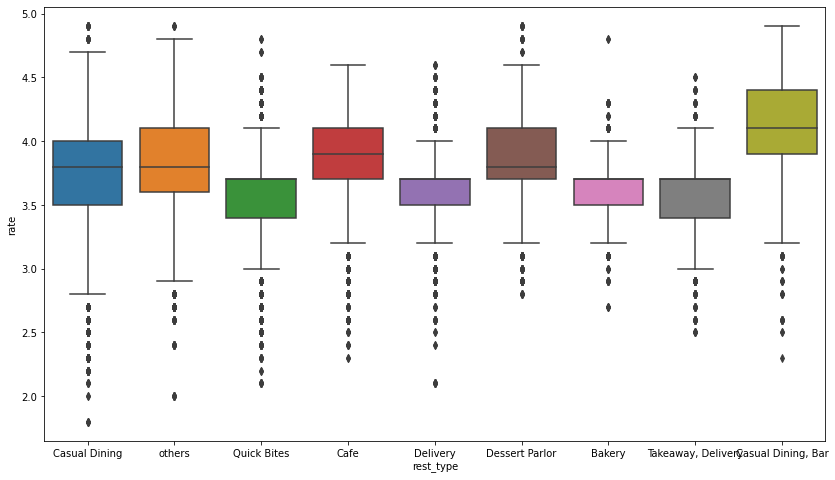

In [44]:
# Question-6
plt.figure(figsize=(14,8))
sns.boxplot(x='rest_type', y='rate', data=df)

In [45]:
# Question-7
df3 = pd.pivot_table(df, values=None, index=['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)
df3

VOTES                                           \
rest_type             Bakery    Cafe Casual Dining Casual Dining, Bar   
location                                                                
BTM                     1525   62551        224719              21217   
Banashankari             530   14054         61109                  0   
Banaswadi                358    1389         14018                582   
Bannerghatta Road        614    3609         79849              17312   
Basavanagudi            1240    9408         23422                 88   
Bellandur                327    4623         90958              24801   
Brigade Road             482   13954         72879              20435   
Brookefield             2098   13825         44030               7072   
Church Street              0  145589        172806              75963   
Electronic City          794    3149         47147               1172   
Frazer Town             2540    4011         63419                  0   
HSR                     2230   43836        179526              43402   
Indiranagar             3267   62919        429678              69448   
JP Nagar                2200   28296        239000              39704   
Jayanagar                259   65353        249184              16036   
Kalyan Nagar              70   13286         70783               5822   
Kammanahalli               0   11443         43318               3833   
Koramangala 1st Block    995   91595         47346              24393   
Koramangala 4th Block   2332  120402        115166              18553   
Koramangala 5th Block   1325  285225        642656             249678   
Koramangala 6th Block    106   63196        123236                  0   
Koramangala 7th Block    513   20963        142618              67374   
Lavelle Road             280    1607         92017              71972   
MG Road                   36   61636        132950               8630   
Malleshwaram             592    8359         58251              42468   
Marathahalli             789    2941        187863              78192   
New BEL Road              72   24194         35354                614   
Rajajinagar             2387      50         34141              17493   
Residency Road             0    3171         87212                135   
Richmond Road            140    2791         76128               2319   
Sarjapur Road           2388    8334         54514              55380   
Shanti Nagar             113    3579         32488                  0   
Ulsoor                   658   31893         61908              34376   
Whitefield              1189    8129        171004              29904   
others                  3135  196008        330215             161357   

                                                                              \
rest_type             Delivery Dessert Parlor Quick Bites Takeaway, Delivery   
location                                                                       
BTM                      33078           9139      158276              16042   
Banashankari              2845           7739       38401                463   
Banaswadi                  882            679       11321                930   
Bannerghatta Road         3703           4398       40980               2955   
Basavanagudi                 0           2093       51025                 36   
Bellandur                 5045           1839       24461               1351   
Brigade Road                 0          24656       12358                  0   
Brookefield                 39           1165       31248                619   
Church Street                0           3436       13324                  0   
Electronic City           1931            771       29295               1329   
Frazer Town               1439           2043       14424               1648   
HSR                      10708          18587       89577              12866   
Indiranagar              18385          37321   

<AxesSubplot:xlabel='location'>

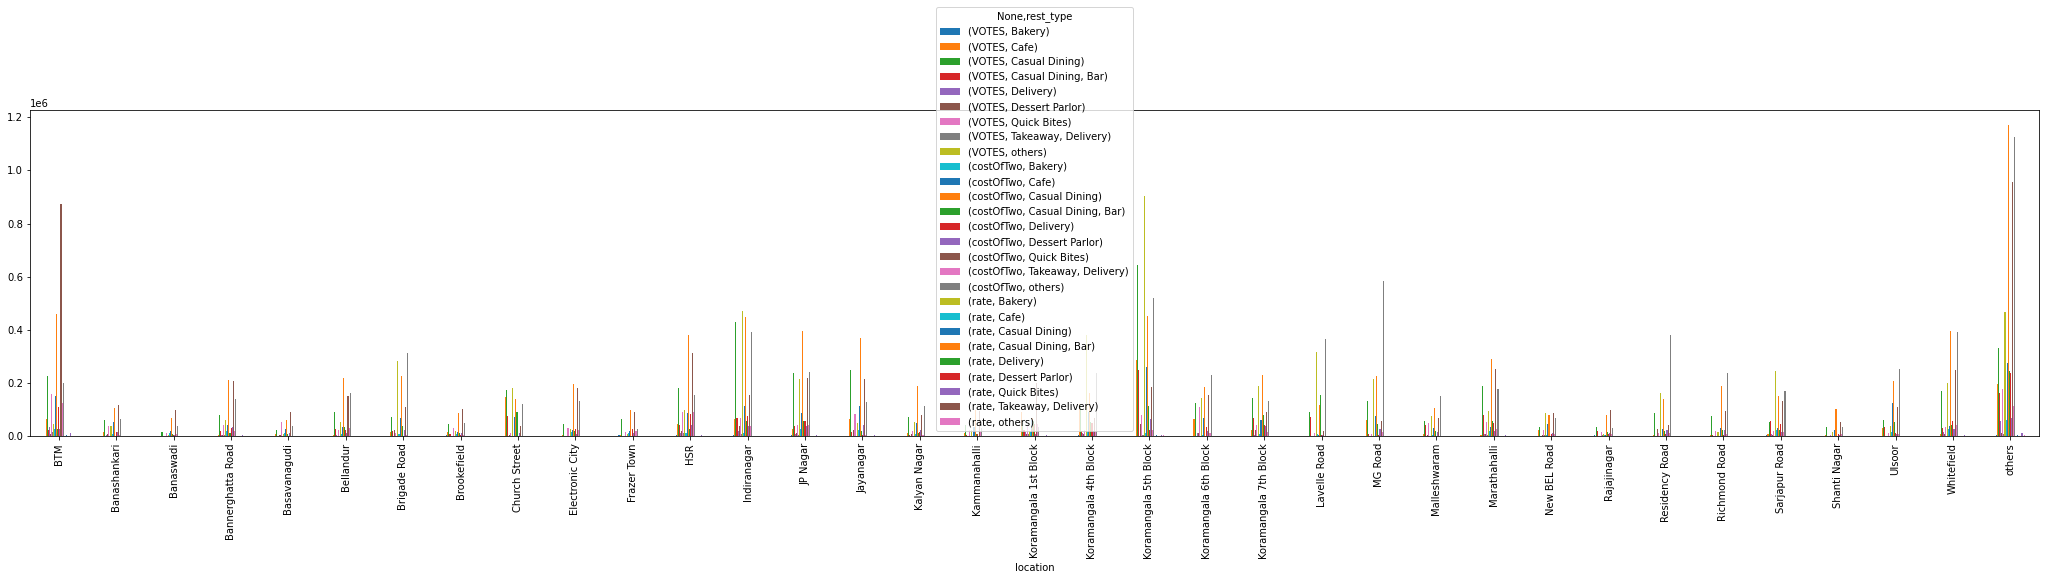

In [46]:
df3.plot(kind = 'bar', figsize = (36,6))

In [47]:
# QUESTION-8
df4 = df[['VOTES','CUISINES']]
df4.drop_duplicates()
df5 = df4.groupby(['CUISINES'])['VOTES'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('VOTES', ascending = False)
df5.head()

,VOTES
CUISINES,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'North Indian'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'South Indian'),
  Text(4, 0, 'North Indian, Mughlai'),
  Text(5, 0, 'Chinese'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'North Indian, South Indian'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Chinese, Momos'),
  Text(10, 0, 'Ice Cream, Desserts'),
  Text(11, 0, 'Cafe, Continental'),
  Text(12, 0, 'Biryani, North Indian, Chinese'),
  Text(13, 0, 'Chinese, Thai, Momos'),
  Text(14, 0, 'South Indian, North Indian, Chinese'),
  Text(15, 0, 'Desserts, Beverages'),
  Text(16, 0, 'Biryani'),
  Text(17, 0, 'Finger Food'),
  Text(18, 0, 'Bakery, Desserts'),
  Text(19, 0, 'Burger,

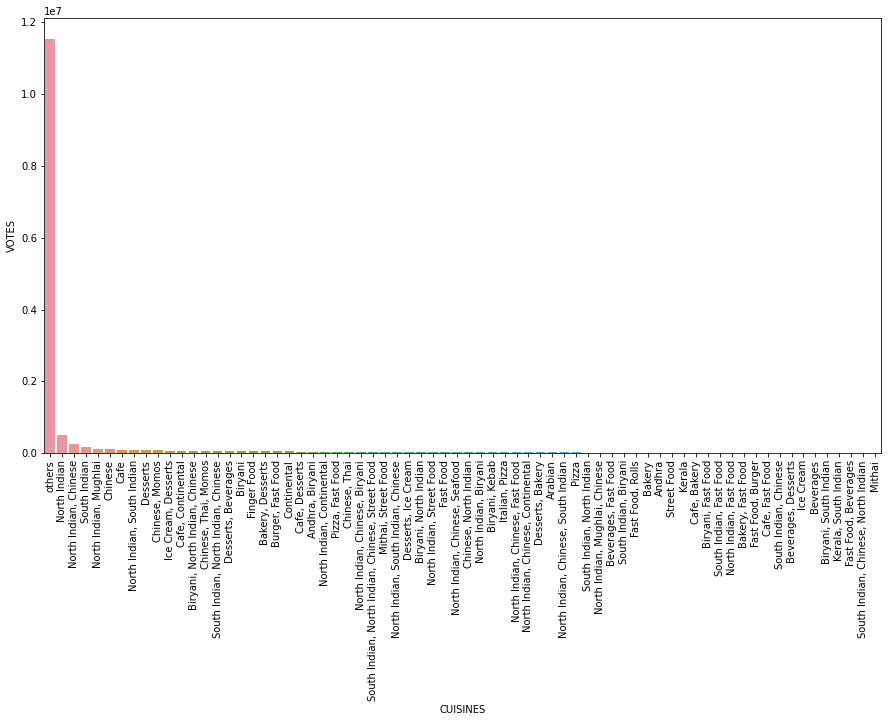

In [48]:
plt.figure(figsize = (15,8))
sns.barplot(df5.index , df5['VOTES'])
plt.xticks(rotation = 90)